In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [127]:
tx_data = pd.read_csv('digikala-orders.csv')
tx_data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [128]:
tx_data['DateTime_CartFinalize'] = pd.to_datetime(data['DateTime_CartFinalize'])
tx_data['YearMonth'] = tx_data['DateTime_CartFinalize'].map(lambda date: 100*date.year + date.month)
tx_data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,YearMonth
0,2714054,469662,21386,2015-10-15 08:50:56,597982.0,محمود آباد,1.0,201510
1,11104039,3063877,248497,2018-02-11 00:29:26,980000.0,خرمدره,1.0,201802
2,4228130,3184893,50144,2016-06-14 00:30:08,229358.0,قرچک,1.0,201606
3,22225624,6888562,70208,2018-09-03 14:37:19,16514.0,قم,1.0,201809
4,4068771,2533490,67627,2016-05-21 11:51:02,133028.0,تهران,1.0,201605


In [129]:
tx_Quantity = tx_data.groupby(['YearMonth'])['Quantity_item'].sum().reset_index()
tx_Quantity.head()

,YearMonth,Quantity_item
0,201309,7.0
1,201310,77.0
2,201311,104.0
3,201312,125.0
4,201401,156.0


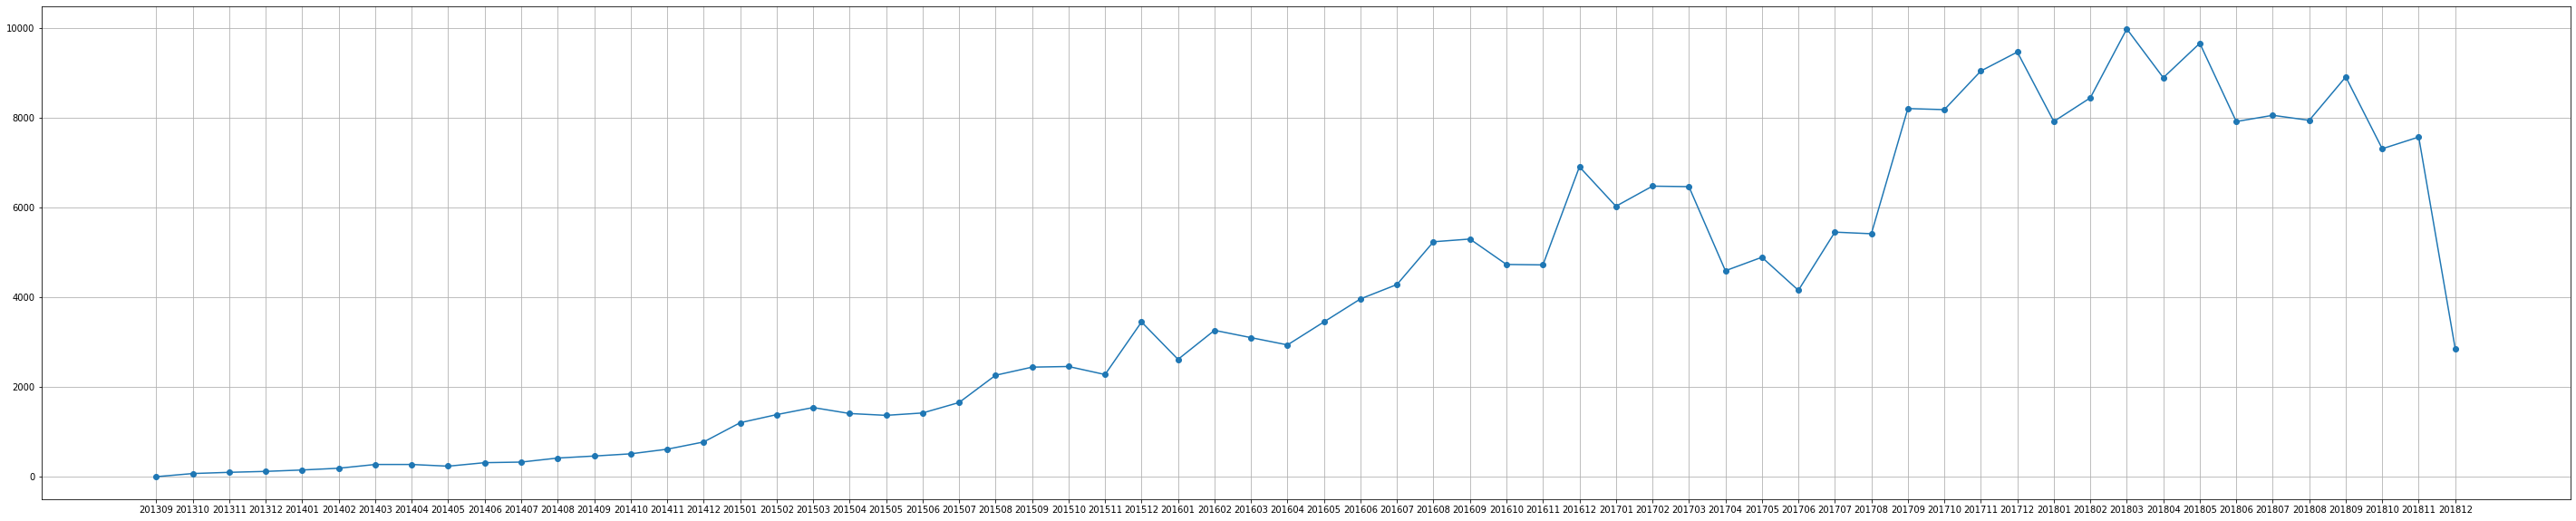

In [130]:
plt.figure(figsize=(50,10))
plt.plot(tx_Quantity['YearMonth'].to_numpy(dtype=str), tx_Quantity['Quantity_item'], marker='o')
plt.grid()

In [133]:
city = tx_data.groupby('city_name_fa')['ID_Customer'].nunique().reset_index()
city.head(1000)

,city_name_fa,ID_Customer
0,آب بر,14
1,آبادان,320
2,آباده,48
3,آباده طشک,3
4,آبدان,2
...,...,...
901,گیوی,10
902,یاسوج,229
903,یاسوکند,1
904,یامچی,1


In [163]:
sumofcotomer = city['ID_Customer'].sum()
tx_city = city.query("ID_Customer > 2000")
other = city.query("ID_Customer <= 2000")
other_sum = other['ID_Customer'].sum()
new_row = {'city_name_fa':'سایر','ID_Customer' :other_sum }
tx_city = tx_city.append(new_row, ignore_index=True)
tx_city.head(10)

,city_name_fa,ID_Customer
0,اصفهان,4664
1,اهواز,3353
2,تبریز,2075
3,تهران,81048
4,رشت,2414
5,شیراز,3076
6,مشهد,4674
7,کرج,4758
8,سایر,47647


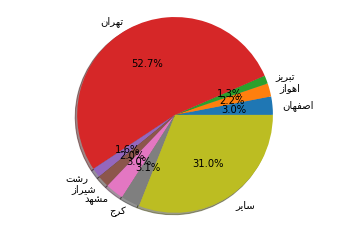

In [164]:
from bidi.algorithm import get_display
from arabic_reshaper import reshape

labels = tx_city['city_name_fa']
sizes = tx_city['ID_Customer']
persian_labels = [get_display(reshape(label)) for label in labels]

plt.pie(sizes, labels=persian_labels, shadow=True, autopct='%1.1f%%')

plt.axis('equal')
plt.show()